In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
players = pd.read_csv('Resources/tennis_atp-master/atp_players.csv', header=None,
                      names=['player_id', 'name_first', 'name_last', 'hand', 'birthdate', 'country'],
                      index_col='player_id')
players['birthdate'] = pd.to_datetime(players.birthdate, format='%Y%m%d', errors='coerce')
players.info()
players.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54405 entries, 100001 to 209370
Data columns (total 5 columns):
name_first    54228 non-null object
name_last     54363 non-null object
hand          48627 non-null object
birthdate     43153 non-null datetime64[ns]
country       54405 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 2.5+ MB


,name_first,name_last,hand,birthdate,country
player_id,,,,,
100001,Gardnar,Mulloy,R,1913-11-22,USA
100002,Pancho,Segura,R,1921-06-20,ECU
100003,Frank,Sedgman,R,1927-10-02,AUS
100004,Giuseppe,Merlo,R,1927-10-11,ITA
100005,Richard Pancho,Gonzales,R,1928-05-09,USA


In [3]:
players.hand.fillna('U', inplace=True)
players.hand = players.hand.astype('category')

In [4]:
players.country = players.country.astype('category')

In [5]:
players.info()
players.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54405 entries, 100001 to 209370
Data columns (total 5 columns):
name_first    54228 non-null object
name_last     54363 non-null object
hand          54405 non-null category
birthdate     43153 non-null datetime64[ns]
country       54405 non-null category
dtypes: category(2), datetime64[ns](1), object(2)
memory usage: 1.8+ MB


,name_first,name_last,hand,birthdate,country
player_id,,,,,
100001,Gardnar,Mulloy,R,1913-11-22,USA
100002,Pancho,Segura,R,1921-06-20,ECU
100003,Frank,Sedgman,R,1927-10-02,AUS
100004,Giuseppe,Merlo,R,1927-10-11,ITA
100005,Richard Pancho,Gonzales,R,1928-05-09,USA


Text(0.5, 1.0, 'Top 10 countries by count of professional tennis players')

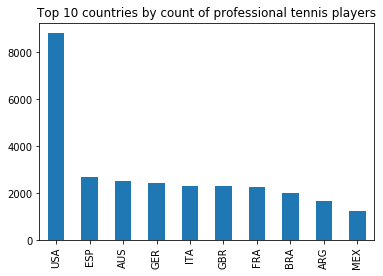

In [6]:
players.country.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 countries by count of professional tennis players')

In [7]:
players[players.birthdate < '1950'].birthdate.count()

1657

Text(0.5, 1.0, 'Top 10 countries by count of professional tennis players born after 1990')

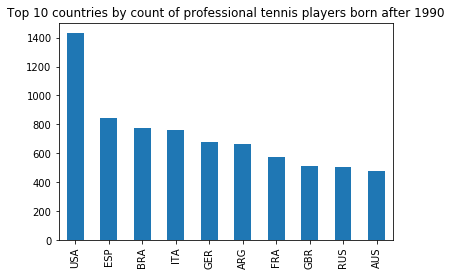

In [8]:
players[players.birthdate > '1990'].country.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 countries by count of professional tennis players born after 1990')

In [9]:
players.to_csv('Resources/tennis_clean/atp_players.csv')

In [10]:
ranking_files = glob.glob('Resources/tennis_atp-master/atp_rankings_[0-9]*')

In [11]:
rankings_list = [pd.read_csv(ranking_file, parse_dates=['ranking_date']) for ranking_file in ranking_files]
rankings_current = pd.read_csv('Resources/tennis_atp-master/atp_rankings_current.csv',
                               names=['ranking_date', 'rank', 'player', 'points'], parse_dates=['ranking_date'])
rankings_list.append(rankings_current)

In [12]:
rankings = pd.concat(rankings_list)
rankings.columns = ['ranking_date', 'player_rank', 'player_id', 'points']
rankings.player_rank.astype('int', inplace=True)
rankings.set_index('player_id', inplace=True)
rankings.info()
rankings.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829498 entries, 101736 to 122609
Data columns (total 3 columns):
ranking_date    datetime64[ns]
player_rank     int64
points          float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 86.3 MB


,ranking_date,player_rank,points
player_id,,,
101736,2000-01-10,1,4135.0
102338,2000-01-10,2,2915.0
101948,2000-01-10,3,2419.0
103017,2000-01-10,4,2184.0
102856,2000-01-10,5,2169.0


In [13]:
rankings['player_age'] = rankings.ranking_date - players.loc[rankings.index].birthdate
rankings.reset_index(inplace=True)
rankings.set_index(['player_id', 'ranking_date'], inplace=True)
rankings.sort_index(inplace=True)
rankings.info()
rankings.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2829498 entries, (100001, 1977-07-04 00:00:00) to (209355, 2019-12-02 00:00:00)
Data columns (total 3 columns):
player_rank    int64
points         float64
player_age     timedelta64[ns]
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 75.7 MB


player_rank  points player_age
player_id ranking_date                                
100001    1977-07-04            366     NaN 23235 days
          1978-01-02            414     NaN 23417 days
          1978-01-16            397     NaN 23431 days
100002    1975-03-10            355     NaN 19621 days
          1975-04-14            383     NaN 19656 days

In [14]:
rankings.to_csv('Resources/tennis_clean/atp_rankings.csv')

In [15]:
rankings.groupby('player_id').min().count()

player_rank    14756
points         12597
player_age     12176
dtype: int64

In [16]:
rankings = rankings.groupby('player_id').filter(lambda x: x.player_rank.min() <= 100)

In [17]:
rankings.groupby('player_id').min().count()

player_rank    1092
points          832
player_age     1084
dtype: int64

In [18]:
rankings = rankings.reset_index('player_id')
rankings.info()
rankings.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 539460 entries, 1973-08-27 to 2019-12-02
Data columns (total 4 columns):
player_id      539460 non-null int64
player_rank    539460 non-null int64
points         441699 non-null float64
player_age     538976 non-null timedelta64[ns]
dtypes: float64(1), int64(2), timedelta64[ns](1)
memory usage: 20.6 MB


,player_id,player_rank,points,player_age
ranking_date,,,,
1973-08-27,100011,114,NaN,14937 days
1973-09-17,100011,114,NaN,14958 days
1973-10-01,100011,101,NaN,14972 days
1973-10-15,100011,96,NaN,14986 days
1973-11-05,100011,102,NaN,15007 days


In [19]:
top_100 = rankings.player_id.unique()

In [20]:
top_100_players = players.loc[top_100]
top_100_players.head()

,name_first,name_last,hand,birthdate,country
player_id,,,,,
100011,Torben,Ulrich,L,1932-10-04,DEN
100016,Ken,Rosewall,R,1934-11-02,AUS
100022,Roy,Emerson,R,1936-11-03,AUS
100025,Barry,Phillips Moore,R,1937-07-09,AUS
100026,Andres,Gimeno,R,1937-08-03,ESP


In [21]:
rankings.to_csv('Resources/tennis_clean/atp_top_100_rankings.csv')

In [22]:
top_100_players.to_csv('Resources/tennis_clean/atp_top_100_players.csv')

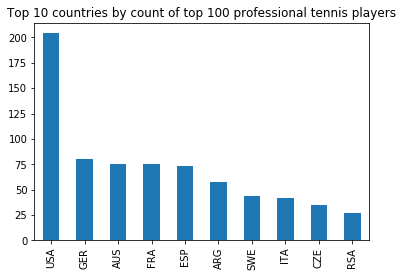

In [23]:
top_100_players.country.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 countries by count of top 100 professional tennis players')
plt.savefig('plot.jpg')

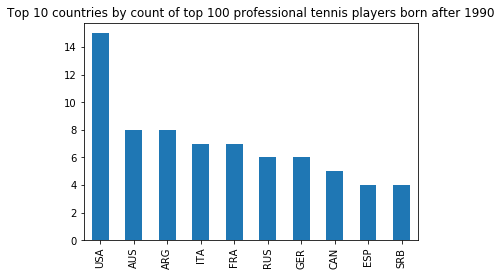

In [24]:
top_100_players[top_100_players.birthdate > '1990'].country.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 countries by count of top 100 professional tennis players born after 1990')
plt.savefig('plot.jpg')

In [25]:
# I don't want any of the challenger or future match data, which is why I specify the first digit of the year.
matches_files = glob.glob('Resources/tennis_atp-master/atp_matches_[12]*')

In [26]:
matches_list = [pd.read_csv(matches_file, parse_dates=['tourney_date']) for matches_file in matches_files]

In [27]:
matches = pd.concat(matches_list, sort=False)

In [28]:
matches.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')

In [29]:
matches_winners = matches[['winner_id', 'tourney_id', 'match_num', 'winner_name', 'tourney_name',
                           'surface', 'draw_size', 'tourney_level',
       'tourney_date',  'winner_seed', 'winner_entry',
       'winner_ht',
       'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_name', 'loser_rank', 'loser_rank_points', 'loser_ht',
        'l_1stWon', 'l_2ndWon', 'l_svpt', 'l_1stIn', 'l_bpSaved', 'l_bpFaced']]

In [30]:
matches_losers = matches[['loser_id', 'tourney_id', 'match_num', 'loser_name', 'tourney_name',
                           'surface', 'draw_size', 'tourney_level',
       'tourney_date',  'loser_seed', 'loser_entry',
       'loser_ht',
       'score', 'best_of', 'round',
       'minutes', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon',
       'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'loser_rank', 'loser_rank_points', 'winner_id', 'winner_name', 'winner_rank', 'winner_rank_points', 'winner_ht',
        'w_1stWon', 'w_2ndWon', 'w_svpt', 'w_1stIn', 'w_bpSaved', 'w_bpFaced']]

In [31]:
matches_winners.columns = ['player_id', 'tournament_id', 'match_id', 'player_name', 'tournament_name', 'surface',
       'draw_size', 'tournament_level', 'tournament_date', 'seed',
       'entry', 'player_height', 'score', 'best_of', 'round_of',
       'minutes', 'aces', 'double_faults', 'service_points', 'first_serves', 'first_serves_won', 'second_serves_won',
       'service_games', 'break_points_saved', 'break_points_faced', 'player_rank',
       'ranking_points', 'opponent_id', 'opponent_name', 'opponent_rank', 'opponent_ranking_points', 'opponent_height',
        'opponent_first_serves_won', 'opponent_second_serves_won', 'opponent_service_points', 'opponent_first_serves', 'opponent_break_points_saved', 'opponent_break_points_faced']
matches_losers.columns = ['player_id', 'tournament_id', 'match_id', 'player_name', 'tournament_name', 'surface',
       'draw_size', 'tournament_level', 'tournament_date', 'seed',
       'entry', 'player_height', 'score', 'best_of', 'round_of',
       'minutes', 'aces', 'double_faults', 'service_points', 'first_serves', 'first_serves_won', 'second_serves_won',
       'service_games', 'break_points_saved', 'break_points_faced', 'player_rank',
       'ranking_points', 'opponent_id', 'opponent_name', 'opponent_rank', 'opponent_ranking_points', 'opponent_height',
        'opponent_first_serves_won', 'opponent_second_serves_won', 'opponent_service_points', 'opponent_first_serves', 'opponent_break_points_saved', 'opponent_break_points_faced']

In [32]:
matches_winners['result'] = 'W'
matches_losers['result'] = 'L'

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
matches = pd.concat([matches_winners, matches_losers])
matches.set_index(['player_id', 'tournament_id', 'match_id'], inplace=True)
matches.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 343640 entries, (105453, 2019-M020, 300) to (104755, 2014-D015, 4)
Data columns (total 36 columns):
player_name                    343640 non-null object
tournament_name                343640 non-null object
surface                        338562 non-null object
draw_size                      8026 non-null float64
tournament_level               343640 non-null object
tournament_date                343640 non-null datetime64[ns]
seed                           99590 non-null object
entry                          40806 non-null object
player_height                  292236 non-null float64
score                          343288 non-null object
best_of                        343640 non-null int64
round_of                       343640 non-null object
minutes                        168300 non-null float64
aces                           170894 non-null float64
double_faults                  170894 non-null float64
service_points                 1

In [34]:
# Corrections to errant data here
# 1. 1991 Tokyo Outdoor tournament has an impossible value for Jim Courier's break point values.
#    Fix: An analysis of the score shows that the values are offset by 4. These are corrected.
# Courier
matches.loc[(101793, '1991-329', 54), 'break_points_faced'] = 4.
matches.loc[(101793, '1991-329', 54), 'break_points_saved'] = 0.
# Courier
matches.loc[(100656, '1991-329', 54), 'opponent_break_points_faced'] = 4.
matches.loc[(100656, '1991-329', 54), 'opponent_break_points_saved'] = 0.
# 2. 1991 Tokyo Outdoor tournament has an impossible value for Ivan Lendl's break point values.
#    Fix: The score has too many possibilities to narrow it down, so I will set the break points to NaN to avoid
#    propogating the errors any farther down the pipeline.
# Lendl
matches.loc[(100656, '1991-329', 55), 'break_points_faced'] = np.nan
matches.loc[(100656, '1991-329', 55), 'break_points_saved'] = np.nan
# Edberg
matches.loc[(101222, '1991-329', 55), 'opponent_break_points_faced'] = np.nan
matches.loc[(101222, '1991-329', 55), 'opponent_break_points_saved'] = np.nan

# Lendl must have distracted stat taker, as these are the only two individual instances of mistakes in the dataset.

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2848: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


In [35]:
players[players.name_last == 'Edberg']

,name_first,name_last,hand,birthdate,country
player_id,,,,,
101222,Stefan,Edberg,R,1966-01-19,SWE


In [36]:
# 3. The 2003 Madrid Masters has many instances where the service points won column 
#    exceeds the total service points played. All instances of service points
#    played and won are set to NaN for this tournament.
# 'service_points', 'first_serves', 'first_serves_won', 'second_serves_won'

madrid_2003_matches = matches.query('tournament_id == \'2003-1536\'').index
matches.loc[madrid_2003_matches, 'service_points'] = np.nan
matches.loc[madrid_2003_matches, 'first_serves'] = np.nan
matches.loc[madrid_2003_matches, 'first_serves_won'] = np.nan
matches.loc[madrid_2003_matches, 'second_serves_won'] = np.nan
matches.loc[madrid_2003_matches, 'opponent_service_points'] = np.nan
matches.loc[madrid_2003_matches, 'opponent_first_serves'] = np.nan
matches.loc[madrid_2003_matches, 'opponent_first_serves_won'] = np.nan
matches.loc[madrid_2003_matches, 'opponent_second_serves_won'] = np.nan

In [37]:
long_long_matches = matches.query('tournament_id == \'2016-M001\' and match_id == 294 \
                                or tournament_id == \'2017-0308\' and match_id == 297').index
matches.loc[long_long_matches, 'minutes'] = np.nan

(0.5984284425203041, 0.0, 1.0)

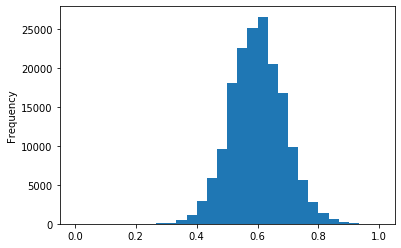

In [38]:
matches['first_serve_percentage'] = matches.first_serves / matches.service_points
matches.first_serve_percentage.plot(kind='hist', bins=30)
# No anomomylous data
matches.first_serve_percentage.mean(), matches.first_serve_percentage.min(), matches.first_serve_percentage.max()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0.5774356604303034, 0.0, 1.0)

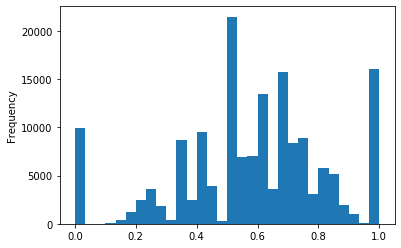

In [39]:
matches['break_points_save_percentage'] = (matches.break_points_saved / matches.break_points_faced)
matches.break_points_save_percentage[~np.isfinite(matches.break_points_save_percentage)] = np.nan
matches.break_points_save_percentage.plot(kind='hist', bins=30)
# Initially two data points resulted in a negative percentage, and were corrected. 
matches.break_points_save_percentage.mean(), matches.break_points_save_percentage.min(), matches.break_points_save_percentage.max()

In [40]:

matches.query('tournament_id == \'1991-329\' and match_id == 55')[['player_name', 'score', 'break_points_saved', 'break_points_faced', 'result']]

,,,player_name,score,break_points_saved,break_points_faced,result
player_id,tournament_id,match_id,,,,,
101222,1991-329,55,Stefan Edberg,6-1 7-5 6-0,6.0,8.0,W
100656,1991-329,55,Ivan Lendl,6-1 7-5 6-0,NaN,NaN,L


(0.6263088532636526, 0.0, 1.0)

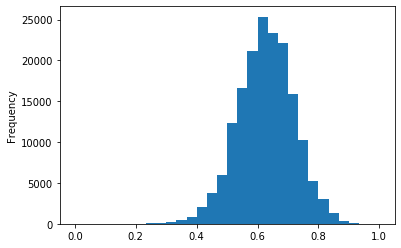

In [41]:
matches['service_points_won'] = matches.first_serves_won + matches.second_serves_won
matches['service_points_won_percentage'] = matches.service_points_won / matches.service_points
matches.service_points_won_percentage.plot(kind='hist', bins=30)
matches.service_points_won_percentage.mean(), matches.service_points_won_percentage.min(), matches.service_points_won_percentage.max()

In [42]:
matches['points'] = matches.service_points + matches.opponent_service_points
matches.points.mean(), matches.points.min(), matches.points.max() 

(158.7248243559719, 1.0, 980.0)

In [43]:
matches['return_points'] = matches.points - matches.service_points
matches.return_points.mean(), matches.return_points.min(), matches.return_points.max() 

(79.36241217798595, 0.0, 491.0)

(0.3736911467366929, 0.0, 1.0)

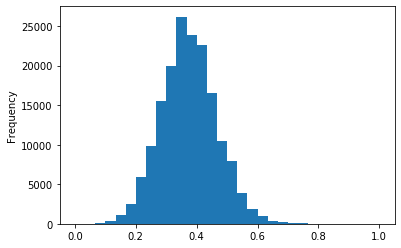

In [44]:
matches['return_points_won'] = matches.return_points - (matches.opponent_first_serves_won + matches.opponent_second_serves_won)
matches['return_points_won_percentage'] = matches.return_points_won / matches.return_points
matches.return_points_won_percentage.plot(kind='hist', bins=30)
matches.return_points_won_percentage.mean(), matches.return_points_won_percentage.min(), matches.return_points_won_percentage.max()

(0.7102635670887585, 0.0, 1.0)

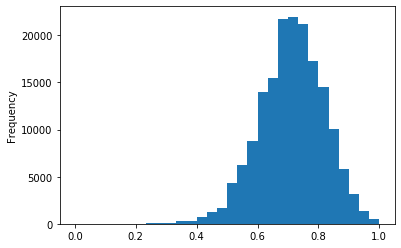

In [45]:
matches['first_serves_won_percentage'] = matches.first_serves_won / matches.first_serves
matches.first_serves_won_percentage.plot(kind='hist', bins=30)
matches.first_serves_won_percentage.mean(), matches.first_serves_won_percentage.min(), matches.first_serves_won_percentage.max()

(0.5050072195261499, 0.0, 1.0)

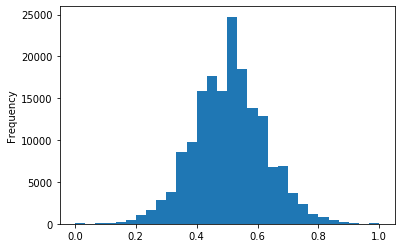

In [46]:
matches['second_serves_won_percentage'] = matches.second_serves_won / (matches.service_points - matches.first_serves)
matches.second_serves_won_percentage.plot(kind='hist', bins=30)
matches.second_serves_won_percentage.mean(), matches.second_serves_won_percentage.min(), matches.second_serves_won_percentage.max()

(0.2897364329116552, 0.0, 1.0)

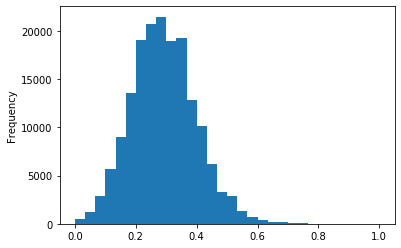

In [47]:
matches['first_serve_return_points_won'] = matches.opponent_first_serves - matches.opponent_first_serves_won
matches['first_serve_return_points_won_percentage'] = matches.first_serve_return_points_won / matches.opponent_first_serves
matches.first_serve_return_points_won_percentage.plot(kind='hist', bins=30)
matches.first_serve_return_points_won_percentage.mean(), matches.first_serve_return_points_won_percentage.min(), matches.first_serve_return_points_won_percentage.max()

(0.4949927804735401, 0.0, 1.0)

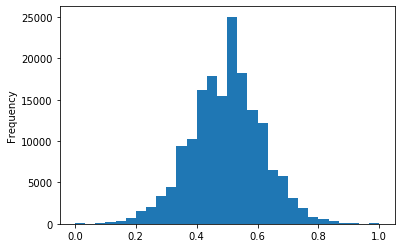

In [48]:
matches['second_serve_return_points_won'] = matches.opponent_service_points - matches.opponent_first_serves - matches.opponent_second_serves_won
matches['second_serve_return_points_won_percentage'] = matches.second_serve_return_points_won / (matches.opponent_service_points - matches.opponent_first_serves)
matches.second_serve_return_points_won_percentage.plot(kind='hist', bins=30)
matches.second_serve_return_points_won_percentage.mean(), matches.second_serve_return_points_won_percentage.min(), matches.second_serve_return_points_won_percentage.max()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(0.4225643395697413, 0.0, 1.0)

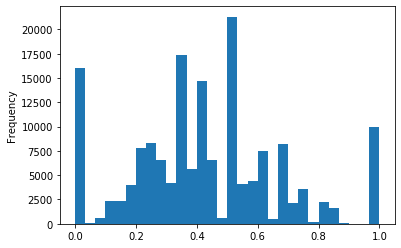

In [49]:
matches['break_points'] = matches.opponent_break_points_faced
matches['break_points_won'] = matches.opponent_break_points_faced - matches.opponent_break_points_saved
matches['break_points_won_percentage'] = matches.break_points_won / matches.break_points
matches.break_points_won_percentage[~np.isfinite(matches.break_points_won_percentage)] = np.nan
matches.break_points_won_percentage.plot(kind='hist', bins=30)
matches.break_points_won_percentage.mean(), matches.break_points_won_percentage.min(), matches.break_points_won_percentage.max()

(0.4999999999998091, 0.0, 1.0)

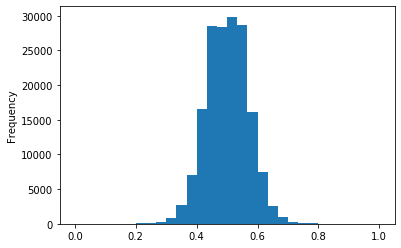

In [50]:
matches['points_won'] = matches.service_points_won + matches.return_points_won
matches['points_won_percentage'] = matches.points_won / matches.points
matches.points_won_percentage.plot(kind='hist', bins=30)
# I don't know what I expected.gif
matches.points_won_percentage.mean(), matches.points_won_percentage.min(), matches.points_won_percentage.max()

40.11673750071331

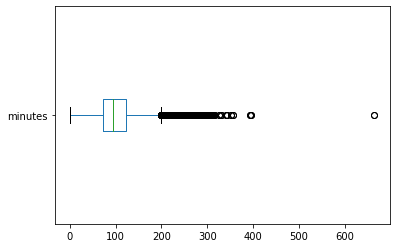

In [51]:
matches.minutes.plot(kind='box', vert=False)
matches.minutes.std()

In [52]:
matches = matches[['player_name', 'opponent_name', 'tournament_name', 'surface', 'draw_size', 'tournament_level',
       'tournament_date', 'seed', 'entry', 'player_height', 'score', 'best_of',
       'round_of', 'minutes', 'aces', 'double_faults', 'service_points',
       'first_serves', 'first_serves_won', 'second_serves_won',
       'service_games', 'break_points_saved', 'break_points_faced',
       'player_rank', 'ranking_points', 'opponent_id', 'opponent_rank',
       'opponent_ranking_points', 'opponent_height', 'result', 'first_serve_percentage',
       'break_points_save_percentage', 'service_points_won',
       'service_points_won_percentage', 'points', 'return_points',
       'return_points_won', 'return_points_won_percentage',
       'first_serves_won_percentage', 'second_serves_won_percentage',
       'first_serve_return_points_won',
       'first_serve_return_points_won_percentage',
       'second_serve_return_points_won',
       'second_serve_return_points_won_percentage', 'break_points',
       'break_points_won', 'break_points_won_percentage', 'points_won',
       'points_won_percentage']]

In [53]:
matches.result = matches.result.astype('category')
matches.surface = matches.surface.astype('category')
matches.tournament_level = matches.tournament_level.astype('category')
matches.round_of = matches.round_of.astype('category')
matches.result = matches.result.astype('category')

In [54]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 343640 entries, (105453, 2019-M020, 300) to (104755, 2014-D015, 4)
Data columns (total 49 columns):
player_name                                  343640 non-null object
opponent_name                                343640 non-null object
tournament_name                              343640 non-null object
surface                                      338562 non-null category
draw_size                                    8026 non-null float64
tournament_level                             343640 non-null category
tournament_date                              343640 non-null datetime64[ns]
seed                                         99590 non-null object
entry                                        40806 non-null object
player_height                                292236 non-null float64
score                                        343288 non-null object
best_of                                      343640 non-null int64
round_of                 

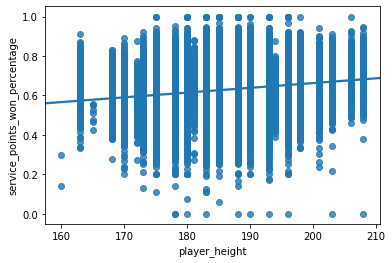

In [55]:
import seaborn as sns

sns.regplot(matches.player_height, matches.service_points_won_percentage)

In [56]:
matches['result_value'] = [1 if result == 'W' else 0 for result in matches.result]

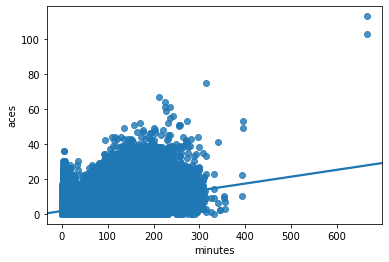

In [57]:
sns.regplot(matches.minutes, matches.aces)

In [58]:
players[players.name_last == 'Zverev']

,name_first,name_last,hand,birthdate,country
player_id,,,,,
100644,Alexander,Zverev,R,1997-04-20,GER
104999,Mischa,Zverev,L,1987-08-22,GER
125903,Xxxxxxx,Zverev,U,NaT,GER


In [59]:
COLUMNS = ['aces', 'double_faults',
       'first_serve_percentage', 'break_points_save_percentage', 'service_points_won_percentage', 
       'return_points_won_percentage',
       'first_serves_won_percentage', 'second_serves_won_percentage',
       'first_serve_return_points_won_percentage',
       'second_serve_return_points_won_percentage', 
       'break_points_won_percentage',
       'points_won_percentage']

CAREER_COLUMNS = ['career_aces', 'career_double_faults',
       'career_first_serve_percentage', 'career_break_points_save_percentage', 'career_service_points_won_percentage', 
       'career_return_points_won_percentage',
       'career_first_serves_won_percentage', 'career_second_serves_won_percentage',
       'career_first_serve_return_points_won_percentage',
       'career_second_serve_return_points_won_percentage', 
       'career_break_points_won_percentage',
       'career_points_won_percentage']

RECENT_COLUMNS = ['recent_aces', 'recent_double_faults',
       'recent_first_serve_percentage', 'recent_break_points_save_percentage', 'recent_service_points_won_percentage', 
       'recent_return_points_won_percentage',
       'recent_first_serves_won_percentage', 'recent_second_serves_won_percentage',
       'recent_first_serve_return_points_won_percentage',
       'recent_second_serve_return_points_won_percentage', 
       'recent_break_points_won_percentage',
       'recent_points_won_percentage']

PAST_YEAR_COLUMNS = ['past_year_aces', 'past_year_double_faults',
       'past_year_first_serve_percentage', 'past_year_break_points_save_percentage', 'past_year_service_points_won_percentage', 
       'past_year_return_points_won_percentage',
       'past_year_first_serves_won_percentage', 'past_year_second_serves_won_percentage',
       'past_year_first_serve_return_points_won_percentage',
       'past_year_second_serve_return_points_won_percentage', 
       'past_year_break_points_won_percentage',
       'past_year_points_won_percentage']

In [60]:
matches.reset_index(inplace=True)
matches.drop_duplicates(subset=['player_id', 'tournament_date', 'match_id'], inplace=True)
matches.drop_duplicates(subset=['player_id', 'tournament_date', 'opponent_id'], inplace=True)
matches.set_index(['player_id', 'tournament_date', 'match_id'], inplace=True)
matches.sort_index(inplace=True)

In [61]:
expanding_mean = matches.reset_index('player_id').groupby('player_id')[COLUMNS].expanding().mean().dropna()

In [62]:
past_year_mean = matches.shift().reset_index(['player_id', 'match_id']).groupby('player_id')[COLUMNS].rolling('365D').mean().bfill()

In [63]:
rolling_mean = matches.shift().reset_index('player_id').groupby('player_id')[COLUMNS].rolling(10).mean().bfill().dropna()

In [64]:
expanding_mean.columns = CAREER_COLUMNS
rolling_mean.columns = RECENT_COLUMNS

In [65]:
matches = matches.merge(expanding_mean, left_index=True, right_index=True, how='left')
matches = matches.merge(rolling_mean, left_index=True, right_index=True, how='left')
for i, column in enumerate(past_year_mean.columns):
    matches[PAST_YEAR_COLUMNS[i]] = past_year_mean[past_year_mean.columns[i]].values

In [66]:
opponent_expanding_mean = matches.reset_index().set_index(['opponent_id', 'tournament_date', 'match_id'])[CAREER_COLUMNS]
opponent_rolling_mean = matches.reset_index().set_index(['opponent_id', 'tournament_date', 'match_id'])[RECENT_COLUMNS]
opponent_past_year_mean = matches.reset_index().set_index(['opponent_id', 'tournament_date', 'match_id'])[PAST_YEAR_COLUMNS]

In [67]:
opponent_expanding_mean.sort_index(inplace=True)
opponent_rolling_mean.sort_index(inplace=True)
opponent_past_year_mean.sort_index(inplace=True)

In [68]:
opponent_expanding_mean.rename_axis(['player_id', 'tournament_date', 'match_id'], inplace=True)
opponent_rolling_mean.rename_axis(['player_id', 'tournament_date', 'match_id'], inplace=True)
opponent_past_year_mean.rename_axis(['player_id', 'tournament_date', 'match_id'], inplace=True)

In [69]:
matches.reset_index(inplace=True)
matches.drop_duplicates(subset=['player_id', 'tournament_date', 'match_id'], inplace=True)
matches.set_index(['player_id', 'tournament_date', 'match_id'], inplace=True)

In [70]:
opponent_expanding_mean = opponent_expanding_mean[~opponent_expanding_mean.index.duplicated()]
opponent_rolling_mean = opponent_rolling_mean[~opponent_rolling_mean.index.duplicated()]
opponent_past_year_mean = opponent_past_year_mean[~opponent_past_year_mean.index.duplicated()]

In [71]:
matches[CAREER_COLUMNS] = matches[CAREER_COLUMNS] - opponent_expanding_mean[CAREER_COLUMNS]

In [72]:
matches[RECENT_COLUMNS] = matches[RECENT_COLUMNS] - opponent_rolling_mean[RECENT_COLUMNS]

In [73]:
matches[PAST_YEAR_COLUMNS] = matches[PAST_YEAR_COLUMNS] - opponent_past_year_mean[PAST_YEAR_COLUMNS]

In [74]:
head_to_head = matches.reset_index().set_index(['player_id', 'opponent_id', 'tournament_date']).sort_index()

In [75]:
head_to_head['result_value'] = head_to_head.result_value.apply(lambda x: -1 if x == 0 else x)

In [76]:
head_to_head = head_to_head.groupby(['player_id', 'opponent_id']).result_value.cumsum()   \
            .groupby(['player_id', 'opponent_id']).shift()                 \
            .reset_index('tournament_date').fillna(0)

In [77]:
players[players.name_last == 'Federer']

,name_first,name_last,hand,birthdate,country
player_id,,,,,
103819,Roger,Federer,R,1981-08-08,SUI


In [78]:
winrate = matches.reset_index().set_index(['player_id', 'tournament_date', 'match_id']).sort_index()

In [79]:
num_matches = winrate.groupby(['player_id', 'surface']).result_value.expanding().count()

In [80]:
wins = (winrate.groupby(['player_id', 'surface']).result_value.expanding().sum())

In [81]:
winrates = (wins / num_matches).groupby(['player_id', 'surface']).shift().reset_index(level=2).result_value

In [82]:
matches = matches.reset_index().set_index(['player_id', 'tournament_date', 'match_id'])

In [83]:
matches['winrate'] = winrates.reset_index().set_index(['player_id', 'tournament_date', 'match_id']).result_value

In [84]:
opponent_winrates = winrates.reset_index() \
                            .set_index(['player_id', 'tournament_date', 'match_id']) \
                            .rename_axis(index={'player_id': 'opponent_id'})

In [85]:
matches.reset_index(inplace=True)
matches.set_index(['opponent_id', 'tournament_date', 'match_id'], inplace=True)
matches = matches[~matches.index.duplicated()]
matches['winrate'] = (matches.winrate - opponent_winrates.result_value).fillna(0)

In [86]:
matches.reset_index(inplace=True)
matches.set_index('player_id', inplace=True)
top_100_matches = matches.loc[top_100]
top_100_matches.reset_index(inplace=True)
top_100_matches.set_index(['player_id', 'tournament_date', 'match_id'], inplace=True)
top_100_matches.sort_index()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


opponent_id tournament_id    player_name  \
player_id tournament_date match_id                                             
100011    1968-02-08      4.0          100186.0      1968-401  Torben Ulrich   
                          8.0          100028.0      1968-401  Torben Ulrich   
          1968-04-28      1.0          100119.0     1968-D013  Torben Ulrich   
                          3.0          100035.0     1968-D013  Torben Ulrich   
          1968-05-27      69.0         109765.0      1968-520  Torben Ulrich   
...                                         ...           ...            ...   
206173    2019-10-14      293.0        104792.0     2019-7485  Jannik Sinner   
                          297.0        126207.0     2019-7485  Jannik Sinner   
                          299.0        104527.0     2019-7485  Jannik Sinner   
          2019-10-21      275.0        104259.0     2019-0337  Jannik Sinner   
                          288.0        104792.0     2019-0337  Jannik Sinner   

                                            opponent_name  \
player_id tournament_date match_id                          
100011    1968-02-08      4.0               Jeff Borowiak   
                          8.0              Manuel Santana   
          1968-04-28      1.0                Ilie Nastase   
                          3.0                  Ion Tiriac   
          1968-05-27      69.0           Marco Gilardelli   
...                                                   ...   
206173    2019-10-14      293.0              Gael Monfils   
                          297.0            Francis Tiafoe   
                          299.0        Stanislas Wawrinka   
          2019-10-21      275.0     Philipp Kohlschreiber   
                          288.0              Gael Monfils   

                                                 tournament_name surface  \
player_id tournament_date match_id                                         
100011    1968-02-08      4.0                   Philadelphia WCT  Carpet   
                          8.0                   Philadelphia WCT  Carpet   
          1968-04-28      1.0       Davis Cup EUR R1: ROU vs DEN    Clay   
                          3.0       Davis Cup EUR R1: ROU vs DEN    Clay   
          1968-05-27      69.0                     Roland Garros    Clay   
...                                                          ...     ...   
206173    2019-10-14      293.0                          Antwerp    Hard   
                          297.0                          Antwerp    Hard   
                          299.0                          Antwerp    Hard   
          2019-10-21      275.0                           Vienna    Hard   
                          288.0                           Vienna    Hard   

                                    draw_size tournament_level seed entry  \
player_id tournament_date match_id                                          
100011    1968-02-08      4.0            16.0                A  NaN   NaN   
                          8.0            16.0                A  NaN   NaN   
          1968-04-28      1.0             4.0                D  NaN   NaN   
                          3.0             4.0                D  NaN   NaN   
          1968-05-27      69.0          128.0                G  NaN   NaN   
...                                       ...              ...  ...   ...   
206173    2019-10-14      293.0          32.0                A  NaN    WC   
                          297.0          32.0                A  NaN    WC   
                          299.0          32.0                A  NaN    WC   
          2019-10-21      275.0          32.0                A  NaN    WC   
                          288.0          32.0                A  NaN    WC   

                                    ...  \
player_id tournament_date match_id  ...   
100011    1968-02-08      4.0       ...   
                          8.0       ...   
          1968-04-28      1.0       ..

In [87]:
top_100_matches.reset_index(inplace=True)
top_100_matches.set_index(['player_id', 'opponent_id', 'tournament_date'], inplace=True)
head_to_head.reset_index(inplace=True)
head_to_head.set_index(['player_id', 'opponent_id', 'tournament_date'], inplace=True)

In [88]:
top_100_matches['h2h'] = head_to_head

In [89]:
top_100_matches.reset_index(inplace=True)
top_100_matches.set_index(['player_id', 'tournament_date', 'match_id'], inplace=True)

In [90]:
top_100_matches = top_100_matches.dropna(subset=['opponent_id'])

In [91]:
top_100_matches['age_diff'] = (players.loc[top_100_matches.index.get_level_values(0)].birthdate.values - 
 players.loc[top_100_matches.opponent_id].birthdate.values)

In [92]:
top_100_matches['age_diff'] = top_100_matches.age_diff.dt.days

In [93]:
top_100_matches.to_csv('Resources/tennis_clean/atp_top_100_matches.csv')

In [94]:
players.query("player_id == 105379")

,name_first,name_last,hand,birthdate,country
player_id,,,,,
105379,Aljaz,Bedene,R,1989-07-18,SLO


In [95]:
top_100_matches.query('player_name == \'Grigor Dimitrov\' and opponent_id == 200282')

,,,opponent_id,tournament_id,player_name,opponent_name,tournament_name,surface,draw_size,tournament_level,seed,entry,...,past_year_return_points_won_percentage,past_year_first_serves_won_percentage,past_year_second_serves_won_percentage,past_year_first_serve_return_points_won_percentage,past_year_second_serve_return_points_won_percentage,past_year_break_points_won_percentage,past_year_points_won_percentage,winrate,h2h,age_diff
player_id,tournament_date,match_id,,,,,,,,,,,,,,,,,,,,,
105777,2019-08-26,215.0,200282.0,2019-560,Grigor Dimitrov,Alex De Minaur,Us Open,Hard,128.0,G,NaN,NaN,...,-0.012489,-0.002875,-0.059732,0.006842,-0.041707,0.034531,-0.018062,-0.028864,0.0,-2834.0
